In [2]:
import numpy as np
import open3d as o3d
import os
import pandas as pd
from FSVVD_data_utils import resample_dataframe, visualize_comparison, convert_orientation_to_sin_cos,convert_sin_cos_to_orientation
# read FSVVD and preprocess to 300 frames

# read FSVVD user behavior data and resample to 60 frames

# align FSVVD and user behavior data




In [7]:
%run FSVVD_data_utils.py

# fix alpha data error

In [13]:
import os

def fix_ply_alpha(file_path, file_name, fixed_file_path):
    # Construct full input and output paths
    input_full_path = os.path.join(file_path, file_name)
    output_file_name = file_name.replace(".ply", "_fixed.ply")
    output_full_path = os.path.join(fixed_file_path, output_file_name)

    # Read the .ply file
    with open(input_full_path, 'r') as file:
        lines = file.readlines()

    # Detect the end of the header
    header_end_idx = None
    for i, line in enumerate(lines):
        if line.strip() == "end_header":
            header_end_idx = i
            break

    if header_end_idx is None:
        raise ValueError("Invalid .ply file: Missing end_header")

    # Process and modify the header
    original_header = lines[:header_end_idx + 1]
    new_header = []
    for line in original_header:
        if not line.strip().startswith("property uchar alpha"):
            new_header.append(line)
    # Alternatively, using list comprehension:
    # new_header = [line for line in original_header if not line.strip().startswith("property uchar alpha")]

    # Process vertex data by removing the last element (alpha)
    vertex_data = lines[header_end_idx + 1:]
    fixed_data = []
    for line in vertex_data:
        elements = line.strip().split()
        if len(elements) == 7:  # x, y, z, r, g, b, alpha
            fixed_line = " ".join(elements[:6])  # Remove the alpha value
            fixed_data.append(fixed_line)
        else:
            # Handle lines that do not have 7 elements (if any)
            fixed_data.append(line.strip())

    # Ensure the output directory exists
    os.makedirs(os.path.dirname(output_full_path), exist_ok=True)

    # Write the modified header and vertex data to the new file
    with open(output_full_path, 'w') as file:
        file.writelines(new_header)
        file.write("\n")  # Ensure there's a newline after the header
        file.write("\n".join(fixed_data))
        file.write("\n")  # Optional: Add a newline at the end of the file

    print(f"Fixed .ply file saved as {output_full_path}")
    return output_full_path

# Example Usage
# file_path = '../../Chatting/Raw/'
# file_name = 'chatting_3_raw.ply'
# fixed_file_path = '../../Chatting/Fixed/'
# fix_ply_alpha(file_path, file_name, fixed_file_path)

In [17]:
raw_file_path = '../point_cloud_data/FSVVD/Chatting/Raw/'
# raw_file_path = '../point_cloud_data/FSVVD/Pulling_trolley/Raw/'
fixed_file_path = '../point_cloud_data/processed_FSVVD/fixed_alpha/Chatting/Raw/'
# fixed_file_path = '../point_cloud_data/processed_FSVVD/fixed_alpha/Pulling_trolley/Raw/'
# get all files in the directory raw_file_path
import os
files = os.listdir(raw_file_path)
for file in files:
    if file.endswith('.ply'):
        # only process file with name '_number_' and number is less than 300
        if int(file.split('_')[-2]) >= 300: # do not process file with number >= 300
        # if int(file.split('_')[-2]) >= 1: # do not process file with number >= 300
            continue
        fixed_file = fix_ply_alpha(raw_file_path, file, fixed_file_path)
        # Load the fixed .ply file
        pcd = o3d.io.read_point_cloud(fixed_file)

        # Visualize the point cloud
        # o3d.visualization.draw_geometries([pcd])
        # w


Fixed .ply file saved as ../point_cloud_data/processed_FSVVD/fixed_alpha/Chatting/Raw/chatting_9_raw_fixed.ply
Fixed .ply file saved as ../point_cloud_data/processed_FSVVD/fixed_alpha/Chatting/Raw/chatting_132_raw_fixed.ply
Fixed .ply file saved as ../point_cloud_data/processed_FSVVD/fixed_alpha/Chatting/Raw/chatting_122_raw_fixed.ply
Fixed .ply file saved as ../point_cloud_data/processed_FSVVD/fixed_alpha/Chatting/Raw/chatting_76_raw_fixed.ply
Fixed .ply file saved as ../point_cloud_data/processed_FSVVD/fixed_alpha/Chatting/Raw/chatting_66_raw_fixed.ply
Fixed .ply file saved as ../point_cloud_data/processed_FSVVD/fixed_alpha/Chatting/Raw/chatting_14_raw_fixed.ply


KeyboardInterrupt: 

# read FSVVD and preprocess to 300 frames

In [18]:
input_file_path = '../point_cloud_data/processed_FSVVD/fixed_alpha/Chatting/Raw/'
# input_file_path  = '../point_cloud_data/FSVVD/Chatting/Raw/'
output_file_path = '../point_cloud_data/processed_FSVVD/FSVVD_300/Chatting/Raw/'
# read all ply files from input_file_path and save to output_file_path with write_ascii=False using open3d
files = os.listdir(input_file_path)
# remove .DS_Store file if any
files = [file for file in files if file != '.DS_Store']
files.sort(key=lambda x: int(x.split('_')[-3]))
# files

if not os.path.exists(os.path.dirname(output_file_path)):
    os.makedirs(os.path.dirname(output_file_path))

for frame_index in range(0,300):
    # frame_index = 29
    selected_file = files[frame_index%len(files)]
    # print(selected_file)
    pcd = o3d.io.read_point_cloud(input_file_path+selected_file)
    # Visualize the point cloud
    # o3d.visualization.draw_geometries([pcd])
    
    o3d.io.write_point_cloud(f'{output_file_path}{frame_index}_binary.ply', pcd, write_ascii=False)
    # w



In [12]:
pcd = o3d.io.read_point_cloud('../point_cloud_data/processed_FSVVD/FSVVD_300/Chatting/Raw/10_binary.ply')
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [11]:
pcd = o3d.io.read_point_cloud(output_file_path+ '0_binary.ply')
# pcd.points.shape

In [12]:
a = np.array(pcd.points)
a
# np.asarray(pcd.colors)

array([[-0.589366  , -0.598739  ,  0.740311  ],
       [-0.593583  , -0.597745  ,  0.709424  ],
       [-0.573233  , -0.60477   ,  0.740865  ],
       ...,
       [ 1.0689702 ,  1.9797815 ,  1.50418276],
       [ 1.0717629 ,  2.0107287 ,  1.50505245],
       [ 0.        ,  0.9       ,  1.        ]])

# resample user behavior data

In [13]:
user_behavior_file_path = '../point_cloud_data/FSVVD/ACM_MM23 User Behavior Dataset with Tools/User Movement/'
files = os.listdir(user_behavior_file_path)
files_chatting = [file for file in files if 'chatting' in file]
files_chatting


['Guozhaonian_chatting.txt',
 'RenHongyu_chatting.txt',
 'Sunqiran_chatting.txt',
 'sulehan_chatting.txt',
 'LiaoJunjian_chatting.txt',
 'LHJ_chatting.txt',
 'TuYuzhao_chatting.txt',
 'yuchen_chatting.txt',
 'HKY_chatting.txt',
 'FengXuanqi_chatting.txt',
 'fupingyu_chatting.txt',
 'RenZhichen_chatting.txt',
 'WangYan_chatting.txt',
 'huangrenyi_chatting.txt',
 'ChenYongting_chatting.txt',
 'GuoYushan_chatting.txt',
 'liuxuya_chatting.txt']

## read user behavior trajectory

In [14]:
for file in files_chatting:
    file_path = user_behavior_file_path + file
    if file != 'GuoYushan_chatting.txt':
        continue
    # Read the first row to get the column names
    with open(file_path, 'r') as f:
        first_line = f.readline().strip()
        column_names = first_line.split(', ')
    
    # Read the rest of the file using tabs as delimiters
    df_full = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, header=None)
    
    # Set the column names
    df_full.columns = column_names
    
    # Show the first few rows of the DataFrame
    df_full.head()
    break

In [15]:
df_full.columns

Index(['#Frame', 'Timer', 'HeadX', 'HeadY', 'HeadZ', 'HeadRX', 'HeadRY',
       'HeadRZ', 'LHandX', 'LHandY', 'LHandZ', 'LHandRX', 'LHandRY', 'LHandRZ',
       'RHandX', 'RHandY', 'RHandZ', 'RHandRX', 'RHandRY', 'RHandRZ', 'LEyeRX',
       'LEyeRY', 'LEyeRZ', 'REyeRX', 'REyeRY', 'REyeRZ', 'LEyeConf',
       'REyeConf'],
      dtype='object')

In [16]:
sub_column_names = ['#Frame', 'Timer', 'HeadX', 'HeadY', 'HeadZ','HeadRX', 'HeadRY','HeadRZ','LEyeRX','LEyeRY', 'LEyeRZ']
orientation = df_full[sub_column_names]

## dev sub column

In [17]:
numeric_cols = ['#Frame', 'Timer', 'HeadX', 'HeadY', 'HeadZ']
# Orientation columns
orientation_cols = ['HeadRX', 'HeadRY', 'HeadRZ','LEyeRX','LEyeRY', 'LEyeRZ','REyeRX', 'REyeRY', 'REyeRZ']
sub_column_names = numeric_cols + orientation_cols
df = df_full[sub_column_names]
# df = df.head(10)
df.head()

,#Frame,Timer,HeadX,HeadY,HeadZ,HeadRX,HeadRY,HeadRZ,LEyeRX,LEyeRY,LEyeRZ,REyeRX,REyeRY,REyeRZ
0,1,0.036387,0.680176,1.439626,0.899545,31.66218,208.1383,8.525229,26.23427,216.7680,-1.903633e-06,27.10721,212.6741,-4.795643e-07
1,2,0.054646,0.684098,1.445647,0.889978,30.29922,211.9480,8.365969,26.67363,219.3470,9.554550e-07,27.45565,215.4693,0.000000e+00
2,3,0.065185,0.686358,1.448544,0.885436,29.33581,213.4917,8.259197,27.10496,221.3783,-9.591092e-07,27.92231,216.9713,9.662626e-07
3,4,0.109132,0.689108,1.450883,0.880582,28.12841,214.2941,8.452869,27.10256,216.6415,9.590889e-07,27.70670,212.4513,-4.821732e-07
4,5,0.130399,0.698385,1.460778,0.860262,24.54854,219.2513,8.405034,27.05325,215.5647,-9.586669e-07,27.58546,211.3648,4.816389e-07


## convert to sin cos df

In [18]:
# Convert to sine and cosine
df_sin_cos = convert_orientation_to_sin_cos(df, orientation_cols)
df_sin_cos.head()

,#Frame,Timer,HeadX,HeadY,HeadZ,HeadRX_sin,HeadRX_cos,HeadRY_sin,HeadRY_cos,HeadRZ_sin,...,LEyeRY_sin,LEyeRY_cos,LEyeRZ_sin,LEyeRZ_cos,REyeRX_sin,REyeRX_cos,REyeRY_sin,REyeRY_cos,REyeRZ_sin,REyeRZ_cos
0,1,0.036387,0.680176,1.439626,0.899545,0.524910,0.851158,-0.471601,-0.881812,0.148245,...,-0.598576,-0.801066,-3.322466e-08,1.0,0.455657,0.890155,-0.539860,-0.841755,-8.369976e-09,1.0
1,2,0.054646,0.684098,1.445647,0.889978,0.504516,0.863402,-0.529149,-0.848529,0.145495,...,-0.634015,-0.773320,1.667584e-08,1.0,0.461062,0.887368,-0.580267,-0.814427,0.000000e+00,1.0
2,3,0.065185,0.686358,1.448544,0.885436,0.489927,0.871763,-0.551816,-0.833966,0.143651,...,-0.661028,-0.750361,-1.673961e-08,1.0,0.468274,0.883583,-0.601415,-0.798937,1.686446e-08,1.0
3,4,0.109132,0.689108,1.450883,0.880582,0.471449,0.881893,-0.563441,-0.826156,0.146996,...,-0.596806,-0.802385,1.673926e-08,1.0,0.464946,0.885339,-0.536583,-0.843848,-8.415510e-09,1.0
4,5,0.130399,0.698385,1.460778,0.860262,0.415464,0.909610,-0.632723,-0.774378,0.146170,...,-0.581622,-0.813459,-1.673189e-08,1.0,0.463071,0.886321,-0.520485,-0.853871,8.406185e-09,1.0


## resample

In [19]:
# Resample to 60Hz
resampled_df = resample_dataframe(df_sin_cos, 60)
# print(df)
resampled_df

,#Frame,Timer,HeadX,HeadY,HeadZ,HeadRX_sin,HeadRX_cos,HeadRY_sin,HeadRY_cos,HeadRZ_sin,...,LEyeRY_sin,LEyeRY_cos,LEyeRZ_sin,LEyeRZ_cos,REyeRX_sin,REyeRX_cos,REyeRY_sin,REyeRY_cos,REyeRZ_sin,REyeRZ_cos
0,0,0.036387,0.680176,1.439626,0.899545,0.524910,0.851158,-0.471601,-0.881812,0.148245,...,-0.598576,-0.801066,-3.322466e-08,1.0,0.455657,0.890155,-0.539860,-0.841755,-8.369976e-09,1.0
1,1,0.053054,0.682137,1.442636,0.894761,0.514713,0.857280,-0.500375,-0.865170,0.146870,...,-0.616296,-0.787193,-8.274414e-09,1.0,0.458359,0.888762,-0.560063,-0.828091,-4.184988e-09,1.0
2,2,0.069721,0.687046,1.449129,0.884223,0.485308,0.874296,-0.554722,-0.832013,0.144488,...,-0.644972,-0.763367,-8.369895e-09,1.0,0.467442,0.884022,-0.585207,-0.810165,1.054447e-08,1.0
3,3,0.086387,0.687733,1.449714,0.883009,0.480688,0.876828,-0.557629,-0.830061,0.145324,...,-0.628917,-0.776373,-1.771509e-13,1.0,0.466610,0.884461,-0.568999,-0.821392,4.224477e-09,1.0
4,4,0.103054,0.688421,1.450298,0.881796,0.476069,0.879361,-0.560535,-0.828109,0.146160,...,-0.612862,-0.789379,8.369541e-09,1.0,0.465778,0.884900,-0.552791,-0.832620,-2.095516e-09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2488,41.503054,-0.547621,1.477120,0.723267,0.305181,0.952285,0.989850,0.141971,0.199336,...,0.995869,0.090719,-7.765221e-09,1.0,0.287167,0.957837,0.986222,0.165386,7.799779e-09,1.0
2489,2489,41.519721,-0.543079,1.476628,0.733273,0.310729,0.950496,0.991397,0.130705,0.209438,...,0.994993,0.098540,-1.035363e-08,1.0,0.253947,0.965295,0.985179,0.171002,1.291997e-08,1.0
2490,2490,41.536387,-0.541218,1.476479,0.737402,0.312186,0.950019,0.992031,0.125803,0.214797,...,0.993763,0.110262,-5.176814e-09,1.0,0.212029,0.975360,0.983505,0.180378,1.024037e-08,1.0
2491,2491,41.553054,-0.536912,1.476573,0.748070,0.315630,0.948880,0.993601,0.112645,0.225802,...,0.993087,0.117286,0.000000e+00,1.0,0.169259,0.985571,0.983424,0.181108,-3.778143e-09,1.0


In [20]:
# visualize_comparison(df_sin_cos, resampled_df,column='HeadRY_cos')

## convert back to HeadR

In [21]:
resampled_df = convert_sin_cos_to_orientation(resampled_df, orientation_cols)
resampled_df.head()

,#Frame,Timer,HeadX,HeadY,HeadZ,HeadRX,HeadRY,HeadRZ,LEyeRX,LEyeRY,LEyeRZ,REyeRX,REyeRY,REyeRZ
0,0,0.036387,0.680176,1.439626,0.899545,31.662180,208.138300,8.525229,26.23427,216.768000,3.600000e+02,27.107210,212.67410,3.600000e+02
1,1,0.053054,0.682137,1.442636,0.894761,30.980700,210.043150,8.445599,26.45395,218.057500,3.600000e+02,27.281430,214.07170,3.600000e+02
2,2,0.069721,0.687046,1.449129,0.884223,29.033968,213.692298,8.307615,27.10436,220.194606,3.600000e+02,27.868408,215.84174,6.041537e-07
3,3,0.086387,0.687733,1.449714,0.883009,28.732110,213.892900,8.356033,27.10376,219.009900,3.600000e+02,27.814505,214.71130,2.420447e-07
4,4,0.103054,0.688421,1.450298,0.881796,28.430252,214.093502,8.404451,27.10316,217.825194,4.795394e-07,27.760602,213.58086,3.600000e+02


## visualize the comparison

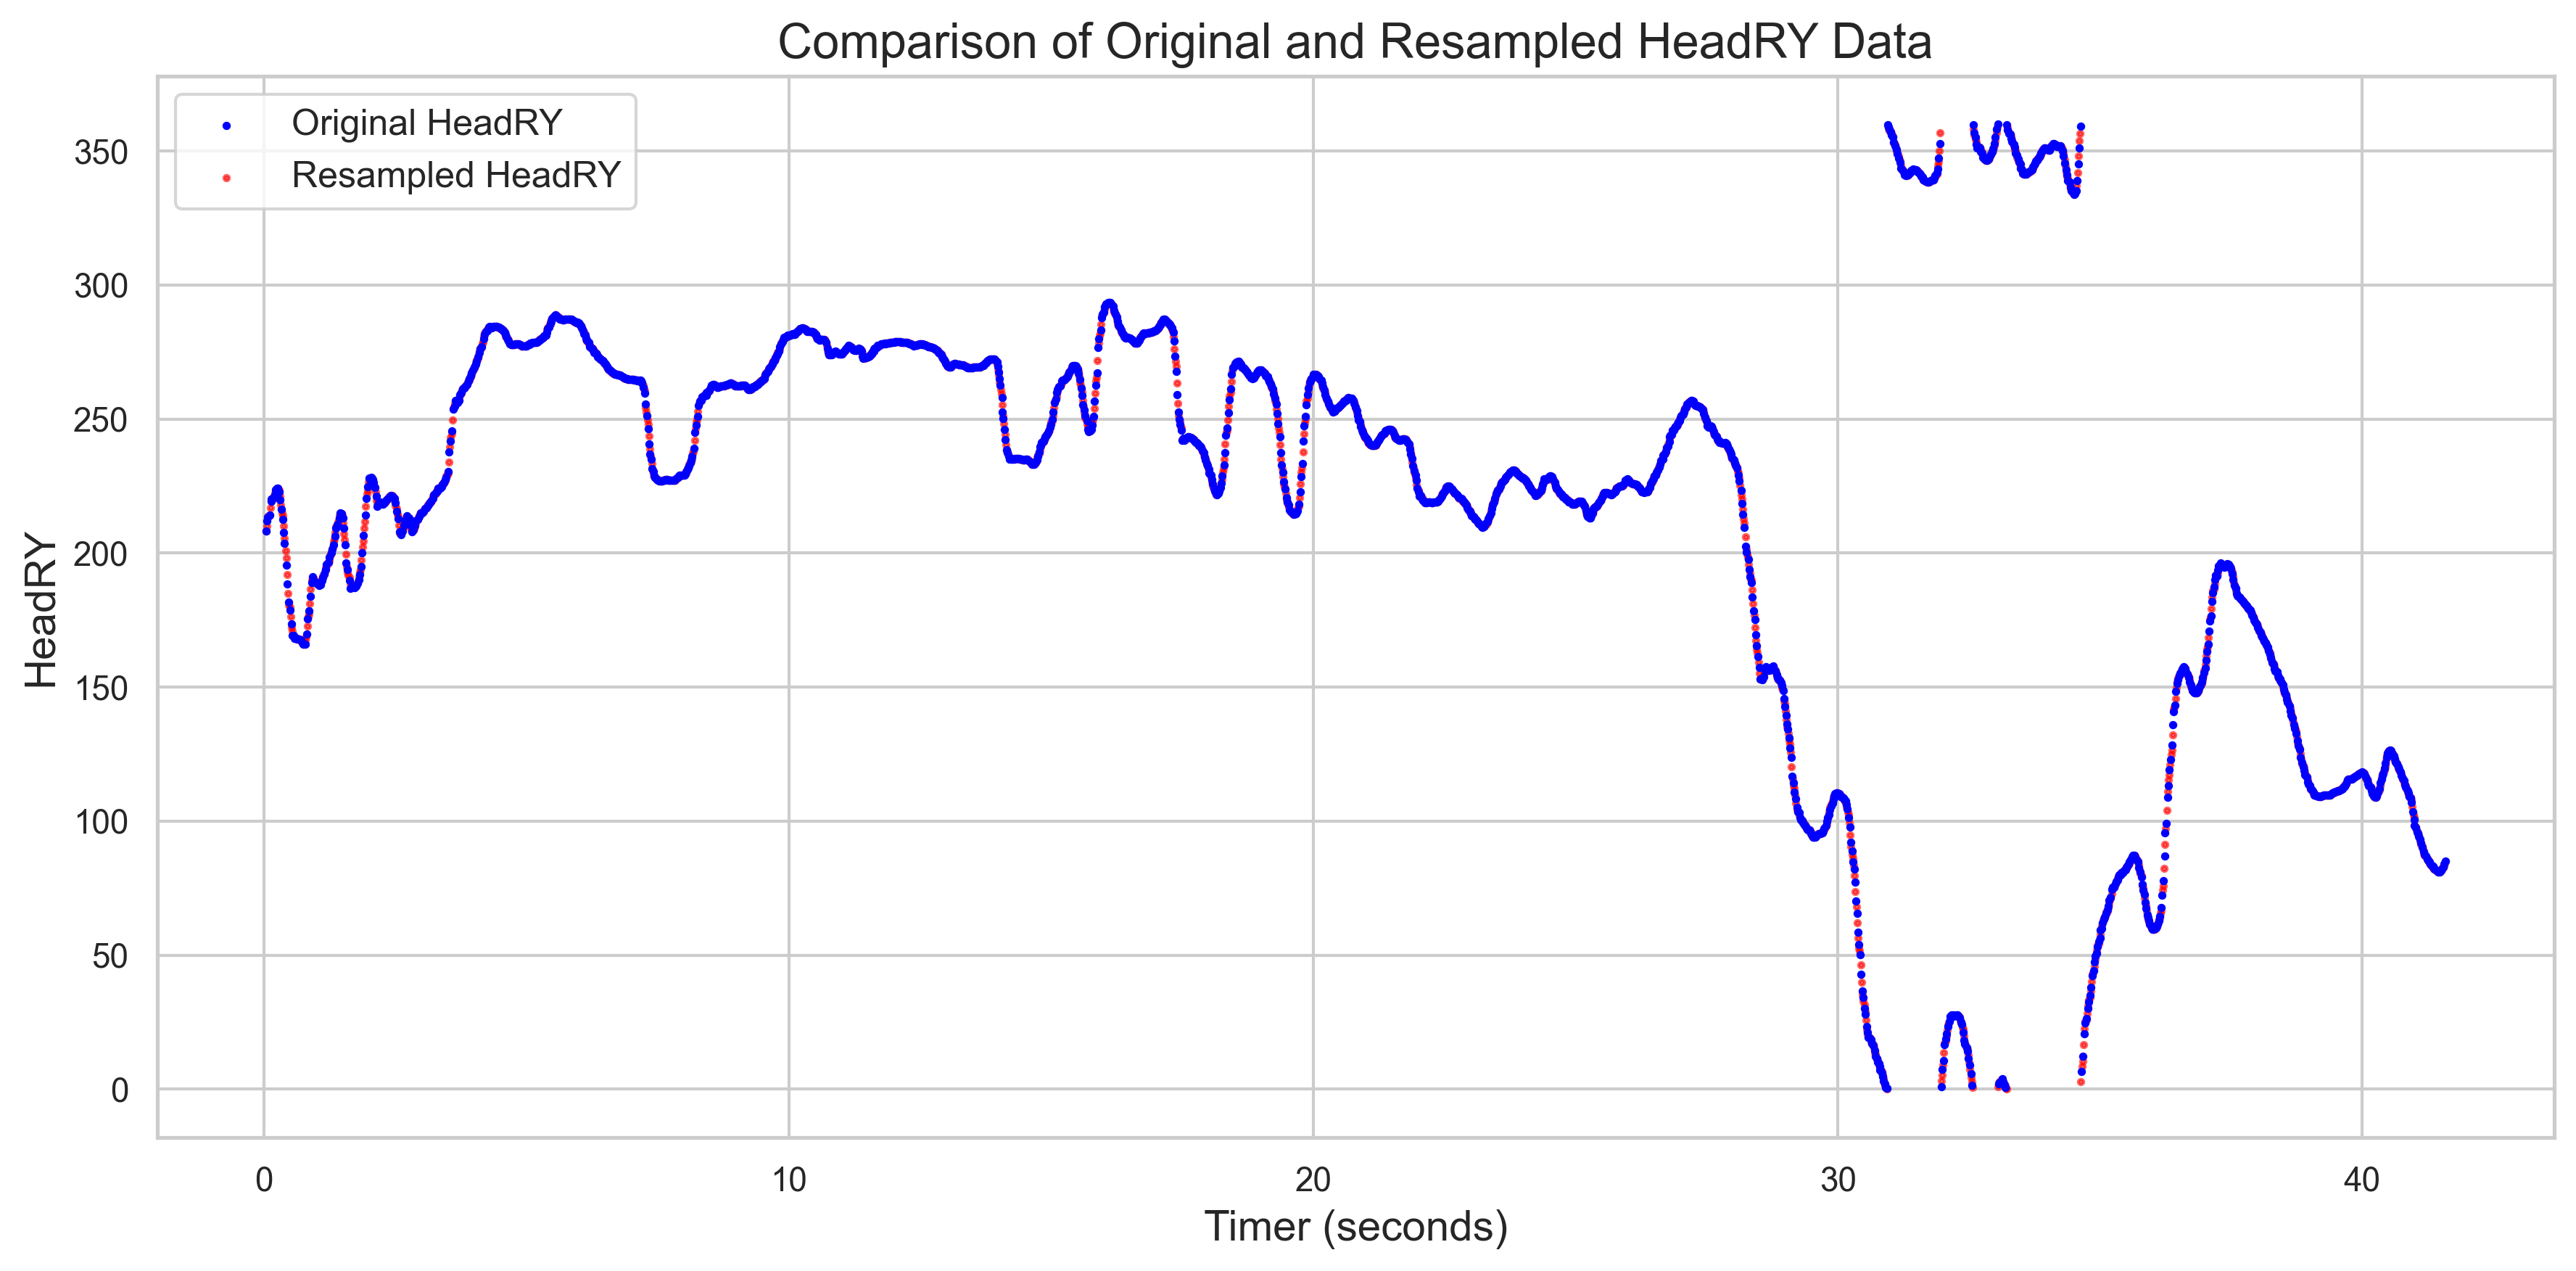

In [22]:
# Visualize the comparison
visualize_comparison(df, resampled_df,column='HeadRY')

In [23]:
visualize_comparison(df, resampled_df,column='HeadY')

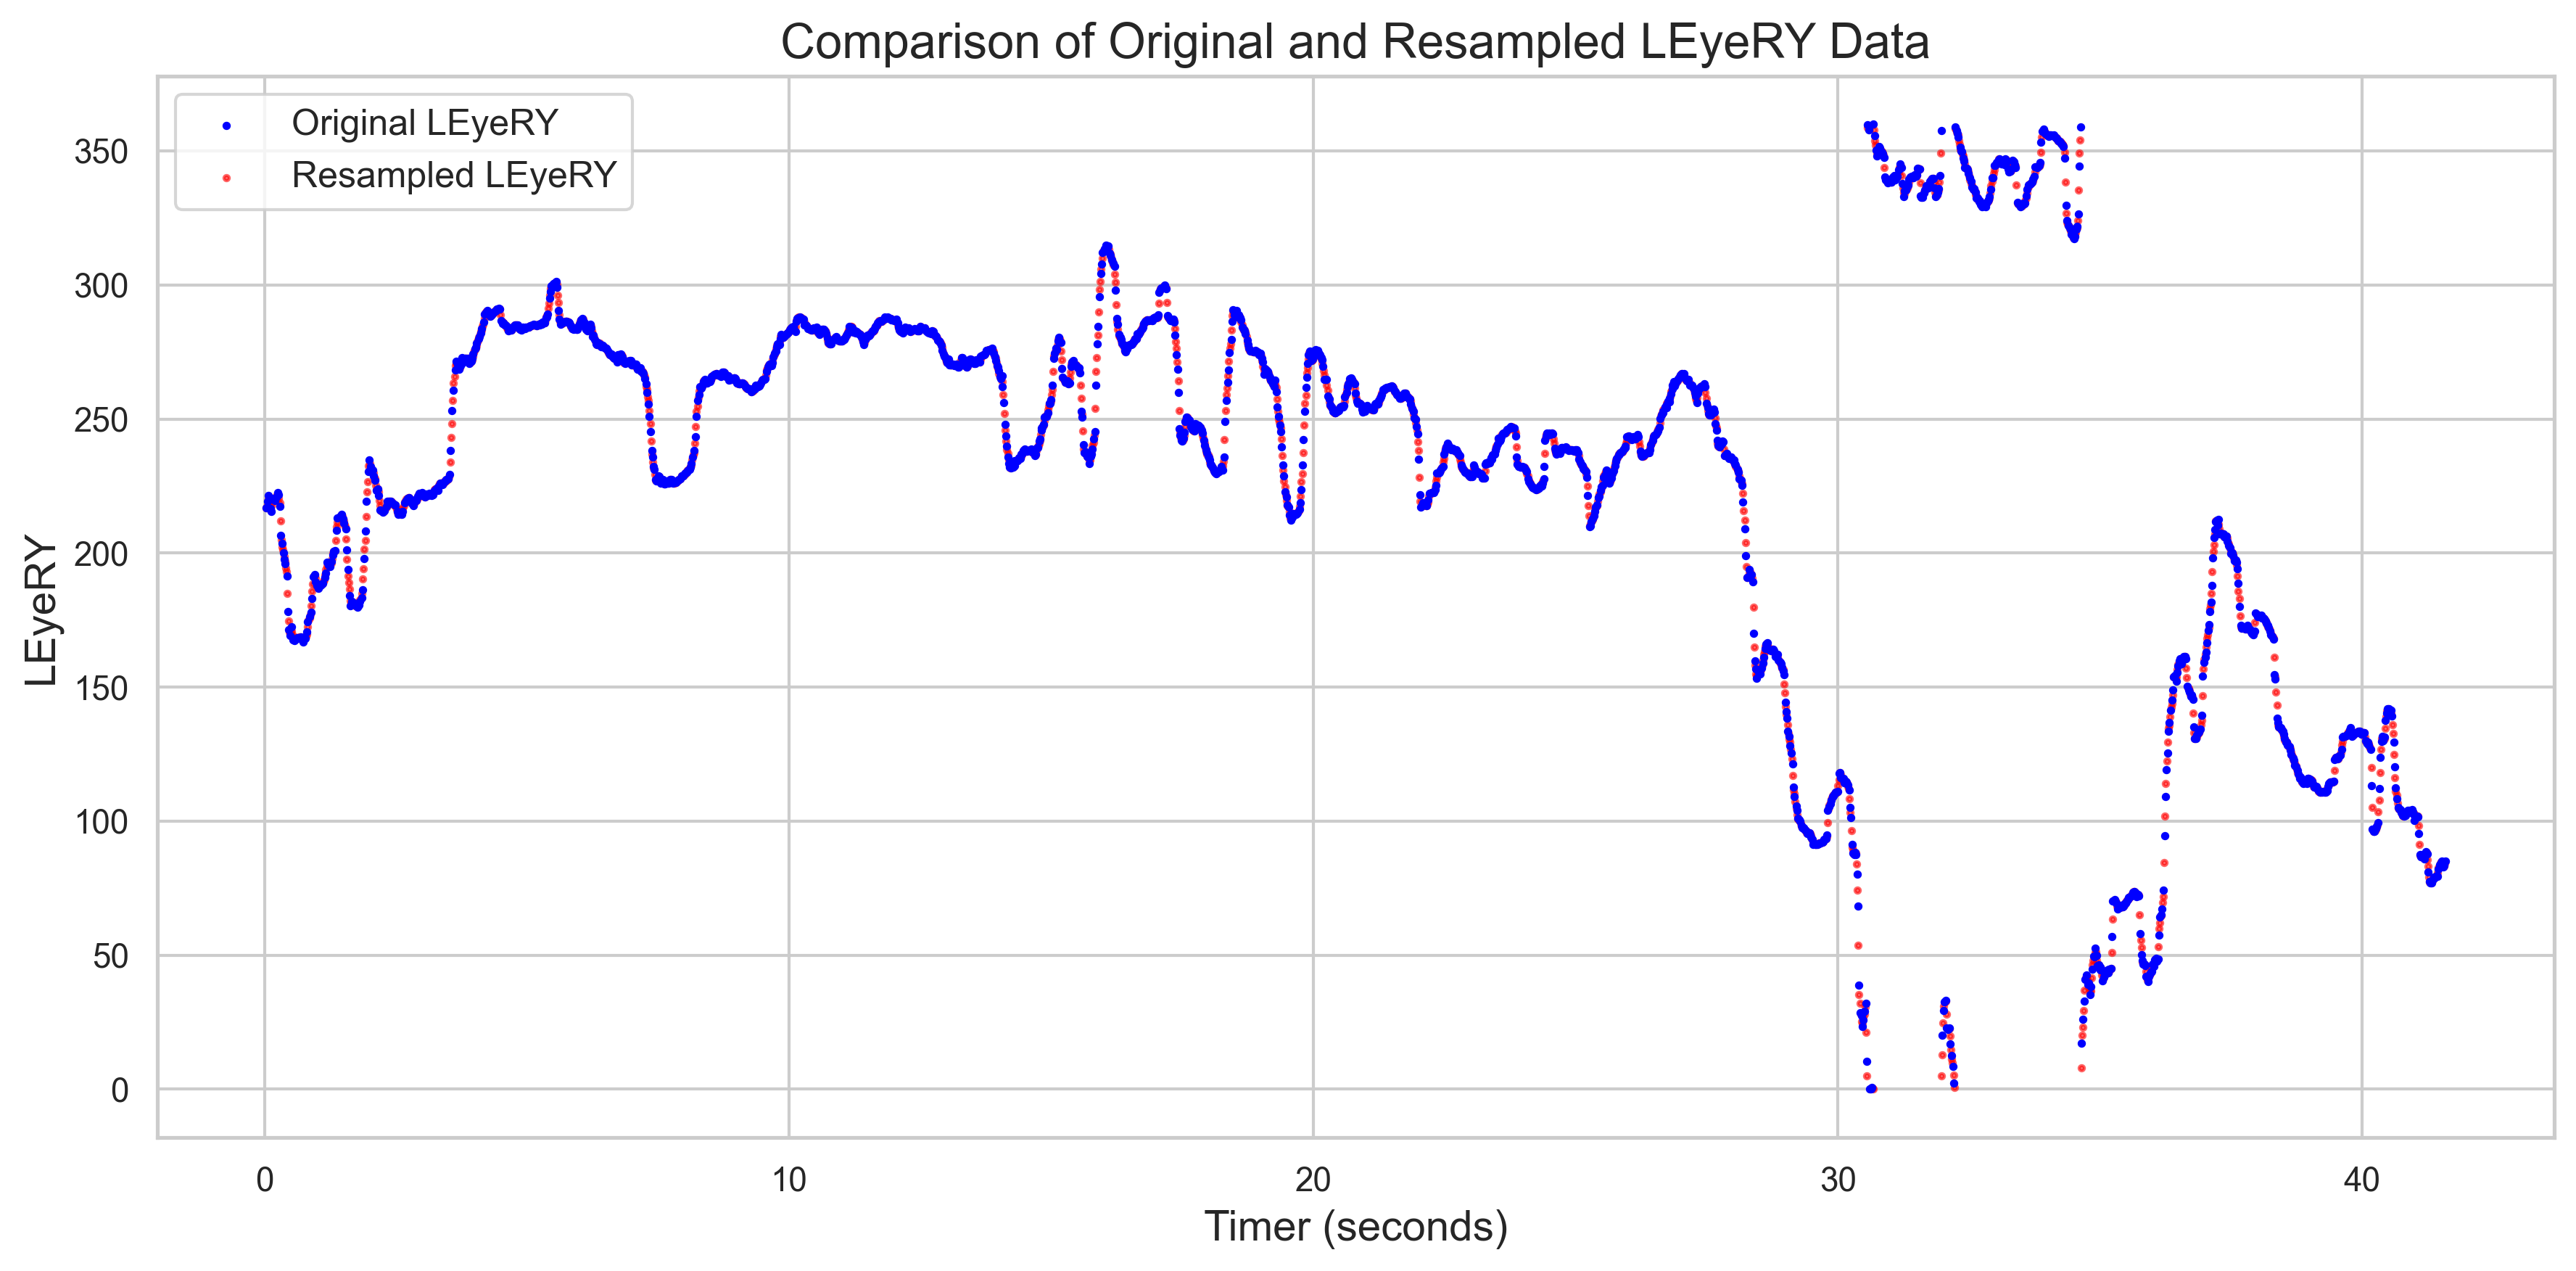

In [116]:
visualize_comparison(df, resampled_df,column='LEyeRY')

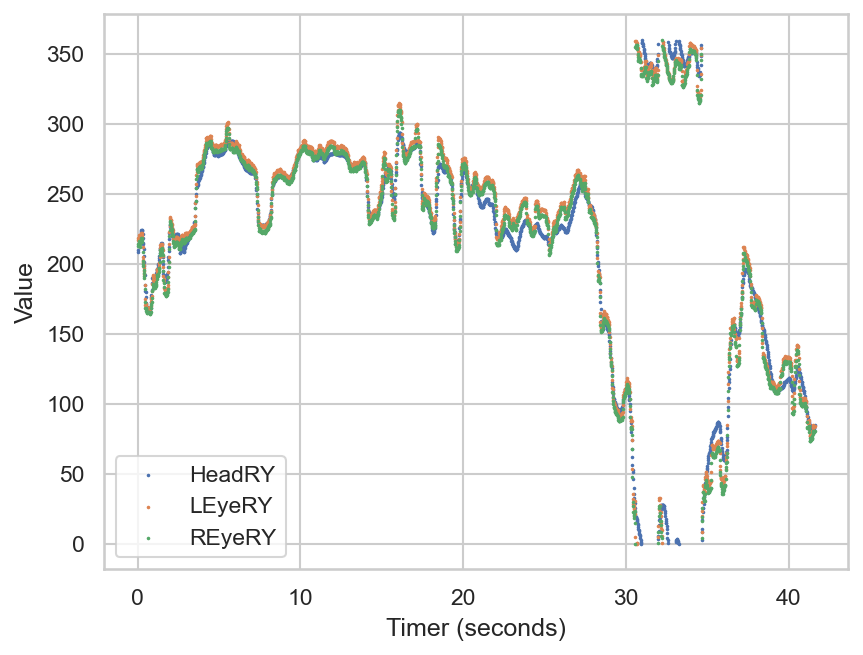

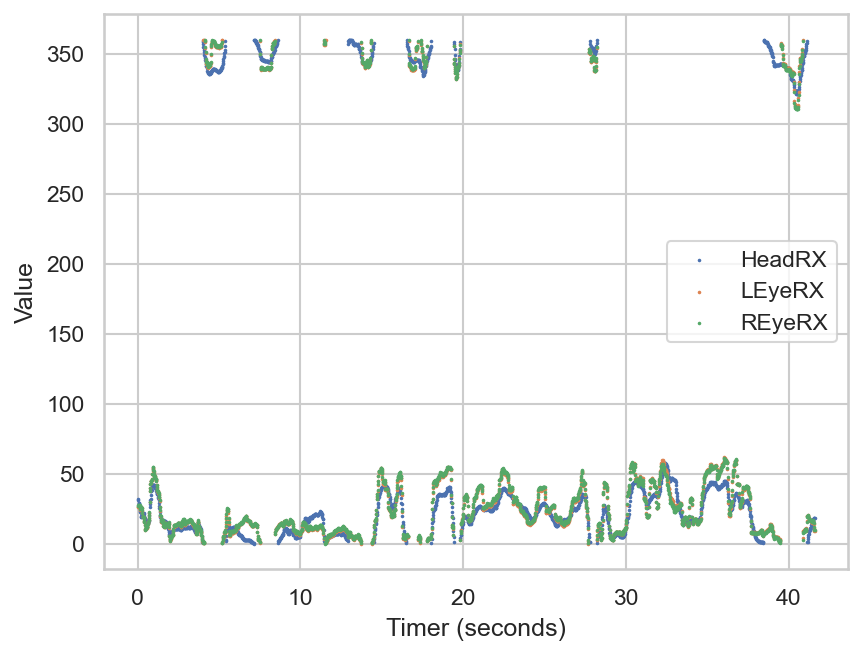

In [122]:
%run FSVVD_data_utils.py
plot_columns(resampled_df, ['HeadRY', 'LEyeRY', 'REyeRY'])
plot_columns(resampled_df, ['HeadRX', 'LEyeRX', 'REyeRX'])
# plot_columns(resampled_df, ['HeadRZ', 'LEyeRZ', 'REyeRZ'])

# save processed user behavior data

In [128]:
# round(resampled_df, 6).to_csv('chatting_3_resampled.csv', index=False)
resampled_df = round(resampled_df, 6)
resampled_df

,#Frame,Timer,HeadX,HeadY,HeadZ,HeadRX,HeadRY,HeadRZ,LEyeRX,LEyeRY,LEyeRZ,REyeRX,REyeRY,REyeRZ
0,0,0.036387,0.680176,1.439626,0.899545,31.662180,208.138300,8.525229,26.234270,216.768000,359.999998,27.107210,212.674100,360.000000
1,1,0.053054,0.682137,1.442636,0.894762,30.980700,210.043150,8.445599,26.453950,218.057500,360.000000,27.281430,214.071700,360.000000
2,2,0.069721,0.687046,1.449129,0.884223,29.033968,213.692298,8.307615,27.104360,220.194606,360.000000,27.868408,215.841740,0.000001
3,3,0.086387,0.687733,1.449714,0.883009,28.732110,213.892900,8.356033,27.103760,219.009900,360.000000,27.814505,214.711300,0.000000
4,4,0.103054,0.688421,1.450298,0.881796,28.430252,214.093502,8.404451,27.103160,217.825194,0.000000,27.760602,213.580860,360.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2488,41.503054,-0.547621,1.477120,0.723267,17.769250,81.837895,11.498280,15.877470,84.795000,360.000000,16.689150,80.480280,0.000000
2489,2489,41.519721,-0.543079,1.476628,0.733273,18.103227,82.489484,12.089774,13.911374,84.344118,359.999999,14.739239,80.153010,0.000001
2490,2490,41.536387,-0.541218,1.476479,0.737402,18.191053,82.772706,12.404006,11.452139,83.668702,360.000000,12.264473,79.607240,0.000001
2491,2491,41.553054,-0.536912,1.476574,0.748070,18.398880,83.531990,13.050255,8.972752,83.264445,0.000000,9.744743,79.565265,360.000000


In [2]:
# save resampled_df to file
resampled_user_behavior_file_path = '../point_cloud_data/processed_FSVVD/Resample_UB/Chatting/'
if not os.path.exists(os.path.dirname(resampled_user_behavior_file_path)):
    os.makedirs(os.path.dirname(resampled_user_behavior_file_path))
resampled_df.to_csv(resampled_user_behavior_file_path + 'RenHongyu_chatting_resampled.txt', index=False, sep=' ')


NameError: name 'os' is not defined

# render FSVVD using UB

In [1]:
import pandas as pd
resampled_user_behavior_file_path = '../point_cloud_data/processed_FSVVD/Resample_UB/Chatting/'
FSVVD_file_path = '../point_cloud_data/processed_FSVVD/FSVVD_300/Chatting/Raw/'
ub_df = pd.read_csv(resampled_user_behavior_file_path + 'RenHongyu_chatting_resampled.txt', delim_whitespace=True)
ub_df

,#Frame,Timer,HeadX,HeadY,HeadZ,HeadRX,HeadRY,HeadRZ,LEyeRX,LEyeRY,LEyeRZ,REyeRX,REyeRY,REyeRZ
0,0,0.036387,0.680176,1.439626,0.899545,31.662180,208.138300,8.525229,26.234270,216.768000,359.999998,27.107210,212.674100,360.000000
1,1,0.053054,0.682137,1.442636,0.894762,30.980700,210.043150,8.445599,26.453950,218.057500,360.000000,27.281430,214.071700,360.000000
2,2,0.069721,0.687046,1.449129,0.884223,29.033968,213.692298,8.307615,27.104360,220.194606,360.000000,27.868408,215.841740,0.000001
3,3,0.086387,0.687733,1.449714,0.883009,28.732110,213.892900,8.356033,27.103760,219.009900,360.000000,27.814505,214.711300,0.000000
4,4,0.103054,0.688421,1.450298,0.881796,28.430252,214.093502,8.404451,27.103160,217.825194,0.000000,27.760602,213.580860,360.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2488,41.503054,-0.547621,1.477120,0.723267,17.769250,81.837895,11.498280,15.877470,84.795000,360.000000,16.689150,80.480280,0.000000
2489,2489,41.519721,-0.543079,1.476628,0.733273,18.103227,82.489484,12.089774,13.911374,84.344118,359.999999,14.739239,80.153010,0.000001
2490,2490,41.536387,-0.541218,1.476479,0.737402,18.191053,82.772706,12.404006,11.452139,83.668702,360.000000,12.264473,79.607240,0.000001
2491,2491,41.553054,-0.536912,1.476574,0.748070,18.398880,83.531990,13.050255,8.972752,83.264445,0.000000,9.744743,79.565265,360.000000


In [9]:
%run FSVVD_data_utils.py
import open3d as o3d
render_flag = True
image_width, image_height = np.array([1920, 1080])
for frame in range(1,2,20):
    pcd = o3d.io.read_point_cloud(FSVVD_file_path + f'{frame}_binary.ply')
    # o3d.visualization.draw_geometries([pcd])
    # get the first row of ub_df
    ub_row = ub_df.iloc[frame]
    # print(ub_row)
    selected_position = ub_row[['HeadX', 'HeadY', 'HeadZ']]
    selected_orientation = ub_row[['HeadRX', 'HeadRY', 'HeadRZ']]
    # print(selected_position)
    
    intrinsic_matrix = get_camera_intrinsic_matrix_fsvvd(image_width, image_height)
    # Define camera extrinsic parameters (example values for rotation and translation)
    pitch_degree, yaw_degree, roll_degree = selected_orientation
    pitch_degree, yaw_degree, roll_degree = [0,0,0]
    para_eye = selected_position
    extrinsic_matrix = get_camera_extrinsic_matrix_from_yaw_pitch_roll_fsvvd(yaw_degree, pitch_degree, roll_degree, para_eye)

    o3d.visualization.draw(pcd,
                           intrinsic_matrix=intrinsic_matrix,extrinsic_matrix=extrinsic_matrix,
                           raw_mode=True,show_skybox=False)    
    # Setting up the visualizer
    # vis = o3d.visualization.Visualizer()
    # # vis.create_window(width=image_width, height=image_height)
    # vis.create_window(visible=render_flag)
    
    # # coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=100, origin=para_eye)
    # vis.add_geometry(pcd)
    # # vis.add_geometry(coordinate_frame)
    # # print("my customize extrincis matrix:")
    # # print(extrinsic_matrix,selected_orientation,selected_position,intrinsic_matrix)
    # view_ctl = vis.get_view_control()
    # # import pdb; pdb.set_trace()
    # cam_pose_ctl = view_ctl.convert_to_pinhole_camera_parameters()
    # cam_pose_ctl.intrinsic.height = image_height
    # cam_pose_ctl.intrinsic.width = image_width
    # cam_pose_ctl.intrinsic.intrinsic_matrix = intrinsic_matrix
    # cam_pose_ctl.extrinsic = extrinsic_matrix
    # view_ctl.convert_from_pinhole_camera_parameters(cam_pose_ctl, allow_arbitrary=True)
    # view_ctl.change_field_of_view()
    # # render
    # vis.poll_events()
    # vis.update_renderer()
    # if render_flag:
    #     vis.run()     
    # vis.destroy_window()        


: 